In [1]:
import pandas as pd
from tensorflow import keras as krs
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')
import os

In [2]:
# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = krs.datasets.cifar10.load_data()

In [3]:
#shape of train and test sets of images
train_images.shape,test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
#shape of train and test sets of labels
train_labels.shape,test_labels.shape

((50000, 1), (10000, 1))

In [5]:
#sample
train_images[888]

array([[[163, 127, 111],
        [166, 130, 114],
        [171, 135, 119],
        ...,
        [193, 154, 138],
        [186, 147, 132],
        [178, 142, 127]],

       [[184, 147, 131],
        [186, 150, 134],
        [190, 154, 138],
        ...,
        [198, 161, 143],
        [193, 155, 138],
        [188, 151, 134]],

       [[186, 149, 133],
        [182, 147, 131],
        [189, 153, 137],
        ...,
        [205, 170, 150],
        [200, 164, 143],
        [196, 161, 141]],

       ...,

       [[109, 110, 123],
        [111, 113, 126],
        [115, 117, 130],
        ...,
        [123, 121, 129],
        [119, 118, 126],
        [113, 118, 124]],

       [[107, 110, 121],
        [110, 113, 124],
        [113, 116, 127],
        ...,
        [121, 119, 127],
        [116, 116, 124],
        [110, 114, 120]],

       [[103, 108, 116],
        [107, 113, 120],
        [110, 116, 123],
        ...,
        [114, 113, 121],
        [111, 112, 120],
        [106, 111, 117]]

In [22]:
plots_path=os.path.join('../results','plots')
os.makedirs(plots_path,exist_ok=True)

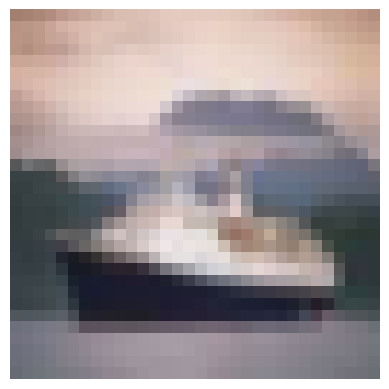

In [23]:
plt.imshow(train_images[888])
plt.axis('off')
plt.savefig(f'{plots_path}/sample_img.png')
plt.show()

In [8]:
train_labels[888]

array([8], dtype=uint8)

In [9]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [10]:
#unique values in labels
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [11]:
scaled_train_x,scaled_test_x=train_images/255,test_images/255

In [12]:
# sequential model
model=krs.models.Sequential()

In [13]:
#layers
model.add(krs.layers.Conv2D(30,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(krs.layers.BatchNormalization())
model.add(krs.layers.MaxPooling2D((2,2)))

model.add(krs.layers.Conv2D(60,(3,3),activation='relu'))
model.add(krs.layers.BatchNormalization())
model.add(krs.layers.MaxPooling2D((2,2)))

model.add(krs.layers.Conv2D(90,(3,3),activation='relu'))
model.add(krs.layers.MaxPooling2D((2,2)))

model.add(krs.layers.Flatten())
model.add(krs.layers.Dropout(0.4))
model.add(krs.layers.Dense(60,activation='relu'))
model.add(krs.layers.Dense(10,activation='softmax'))

In [14]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
history=model.fit(scaled_train_x,train_labels,validation_data=(scaled_test_x,test_labels),epochs=13)

Epoch 1/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 19ms/step - accuracy: 0.3649 - loss: 1.7629 - val_accuracy: 0.4866 - val_loss: 1.4024
Epoch 2/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 20ms/step - accuracy: 0.5640 - loss: 1.2201 - val_accuracy: 0.6038 - val_loss: 1.1146
Epoch 3/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.6253 - loss: 1.0606 - val_accuracy: 0.6098 - val_loss: 1.0645
Epoch 4/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6582 - loss: 0.9693 - val_accuracy: 0.6069 - val_loss: 1.0994
Epoch 5/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.6831 - loss: 0.9085 - val_accuracy: 0.6683 - val_loss: 0.9379
Epoch 6/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.6968 - loss: 0.8609 - val_accuracy: 0.7094 - val_loss: 0.8286
Epoch 7/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7114 - loss: 0.8219 - val_accuracy: 0.7075 - val_loss: 0.8260
Epoch 8/13
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 33s 21ms/step - accuracy: 0.7208 -

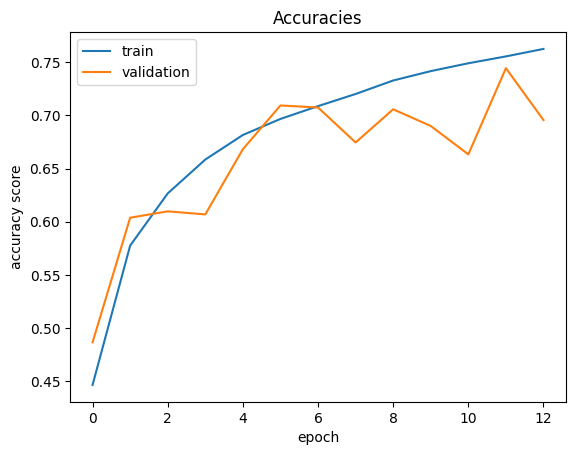

In [24]:

plt.title('Accuracies')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','validation'])
plt.xlabel("epoch")
plt.ylabel("accuracy score")
plt.savefig(f'{plots_path}/accuracies.png')
plt.show()

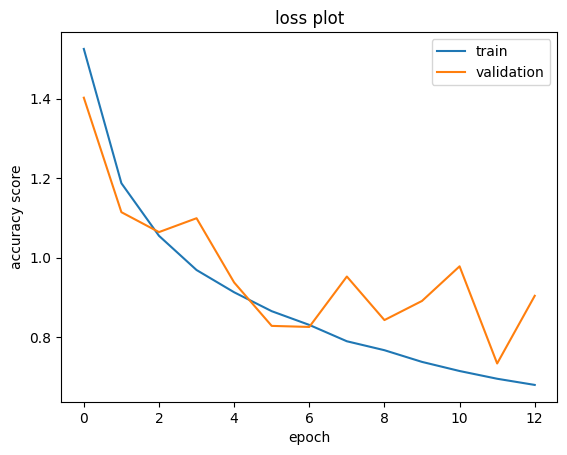

In [25]:
plt.title('loss plot')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','validation'])
plt.xlabel("epoch")
plt.ylabel("accuracy score")
plt.savefig(f'{plots_path}/losses.png')
plt.show()

In [26]:
#model evaluation
loss,accuracy=model.evaluate(scaled_test_x,test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6992 - loss: 0.9063


In [27]:
loss

0.9042905569076538

In [28]:
accuracy

0.6956999897956848

In [31]:
os.makedirs('../trained_models',exist_ok=True)

In [33]:
model.save('../trained_models/classifier.keras')

## Prediction

In [38]:
pred=model.predict(scaled_test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [39]:
pred[646]

array([2.0840239e-06, 6.5869841e-08, 1.7745876e-03, 9.0957153e-01,
       4.6145618e-02, 8.4843980e-03, 3.3976354e-02, 3.6589248e-05,
       8.7653298e-06, 5.3914302e-08], dtype=float32)

In [40]:
np.argmax(pred[646])


3

In [41]:
test_labels[646]

array([3], dtype=uint8)